<a href="https://colab.research.google.com/github/Pavan202020/AI-ML-Learning-Lab/blob/main/house_price_prediction_full_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:
Given a set of features, predict the prices of the houses.

## Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.impute import SimpleImputer as Imputer
from random import choices
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import BaseEstimator

## Getting the Data

In [ ]:
!gdown 1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9

Downloading...
From: https://drive.google.com/uc?id=1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9
To: /content/kaggle_houseprices_modified.csv
100% 459k/459k [00:00<00:00, 29.3MB/s]


In [ ]:
ds = pd.read_csv('/content/kaggle_houseprices_modified.csv')
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,198075.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,199650.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,212325.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,237500.0


In [ ]:
ds["SalePrice"].head()

,SalePrice
0,198075.0
1,199650.0
2,212325.0
3,140000.0
4,237500.0


## EDA

To try and do it by yourself

## Data Pre-processing

In [ ]:
todrop = ['Id']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]

In [ ]:
ds[categorical]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,GasA,Y,SBrkr,Attchd,Y,NaN,NaN,2,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,GasA,Y,SBrkr,Attchd,Y,NaN,NaN,5,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,GasA,Y,SBrkr,Attchd,Y,NaN,NaN,9,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,GasA,Y,SBrkr,Detchd,Y,NaN,NaN,2,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,GasA,Y,SBrkr,Attchd,Y,NaN,NaN,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,GasA,Y,SBrkr,Attchd,Y,NaN,NaN,8,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,GasA,Y,SBrkr,Attchd,Y,MnPrv,NaN,2,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,GasA,Y,SBrkr,Attchd,Y,GdPrv,Shed,5,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,GasA,Y,FuseA,Attchd,Y,NaN,NaN,4,WD,Normal


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
ds.isnull().sum().sort_values()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotShape,0
...,...
MasVnrType,872
Fence,1179
Alley,1369
MiscFeature,1406


In [ ]:
ds.shape

(1460, 81)

In [ ]:
# run the imputation when not making pipeline

ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].median())
ds['MasVnrArea']  = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())


In [ ]:
ds[continuous].isna().sum().sum()

np.int64(0)

## Encoding Features

In [ ]:
def pre_processing(ds, todrop, categorical, cat_to_con):
  #dropping
  ds = ds.drop(columns=todrop)

  #categorical
  logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')

  ds['Electrical'] = ds['Electrical'].fillna(ds['Electrical'].value_counts().index[0])  # mode
  print("no. of nans in categorical cols:", ds[categorical].isna().sum().sum())


  #cat_to_con
  ds['FireplaceQu'] = ds['FireplaceQu'].fillna('NA')
  logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')

  ds.drop(columns = ['PoolQC'], inplace=True)
  cat_to_con.remove('PoolQC')
  print("no. of nans in cat_to_con cols:",ds[cat_to_con].isna().sum().sum())

  #target_encoding
  target = 'SalePrice'
  for col in categorical:
      ds[col] = ds.groupby([col])[target].transform('mean')

  #label encoding
  grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
  for col in grp1:
      ds[col] = ds[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})

  for col in ['BsmtFinType1', 'BsmtFinType2']:
      ds[col] = ds[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

  ds['BsmtExposure'] = ds['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
  ds['Functional'] = ds['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
  ds['GarageFinish'] = ds['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

  print("total nans in the dataframe:", ds.isna().sum().sum())

  return ds

In [ ]:
ds = pre_processing(ds, todrop, categorical, cat_to_con)

no. of nans in categorical cols: 0
no. of nans in cat_to_con cols: 0
total nans in the dataframe: 0


In [ ]:
ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,252692.601839,204994.032276,65.0,8450,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,184007.670192,2008,175316.452684,177454.242947,198075.0
1,207766.905970,204994.032276,80.0,9600,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,178829.893617,...,0,0,201832.730831,195275.313691,0,181414.566176,2007,175316.452684,177454.242947,199650.0
2,252692.601839,204994.032276,68.0,11250,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,216298.142857,2008,175316.452684,177454.242947,212325.0
3,174123.741667,204994.032276,60.0,9550,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,193082.861217,...,0,0,201832.730831,195275.313691,0,184007.670192,2006,175316.452684,146527.787129,140000.0
4,252692.601839,204994.032276,84.0,14260,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,178829.893617,...,0,0,201832.730831,195275.313691,0,197798.869492,2008,175316.452684,177454.242947,237500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,252692.601839,204994.032276,62.0,7917,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,200841.786885,2007,175316.452684,177454.242947,166250.0
1456,207766.905970,204994.032276,85.0,13175,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,155835.051592,195275.313691,0,184007.670192,2010,175316.452684,177454.242947,231000.0
1457,174123.741667,204994.032276,66.0,9042,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,182889.576271,154880.979592,2500,181414.566176,2010,175316.452684,177454.242947,253175.0
1458,207766.905970,204994.032276,68.0,9717,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,181148.804255,2010,175316.452684,177454.242947,156337.5


In [ ]:
ds.shape

(1460, 79)

## Scaling

In [ ]:
# run the scaling when not making pipeline.
# All the viz will work on the standardized and imputed data

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)

In [ ]:
ds_scaled

array([[ 1.29689538,  0.35236535, -0.22087509, ..., -0.28525568,
        -0.25468501,  0.04130749],
       [ 0.30782615,  0.35236535,  0.46031974, ..., -0.28525568,
        -0.25468501,  0.056472  ],
       [ 1.29689538,  0.35236535, -0.08463612, ..., -0.28525568,
        -0.25468501,  0.1785102 ],
       ...,
       [-0.43285061,  0.35236535, -0.1754621 , ..., -0.28525568,
        -0.25468501,  0.57182464],
       [ 0.30782615,  0.35236535, -0.08463612, ..., -0.28525568,
        -0.25468501, -0.36055204],
       [ 0.30782615,  0.35236535,  0.23325479, ..., -0.28525568,
        -0.25468501, -0.30362495]])

## Baseline Model

In [ ]:
## Task: Regression
## Model to use: DTREgressor, XgboostRegressor, GBDTREgressor

In [ ]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)

    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5) ## RMSE
print(mape(y_true, y_pred)) ## MAPE

31247.553546371884
0.10183201832527854


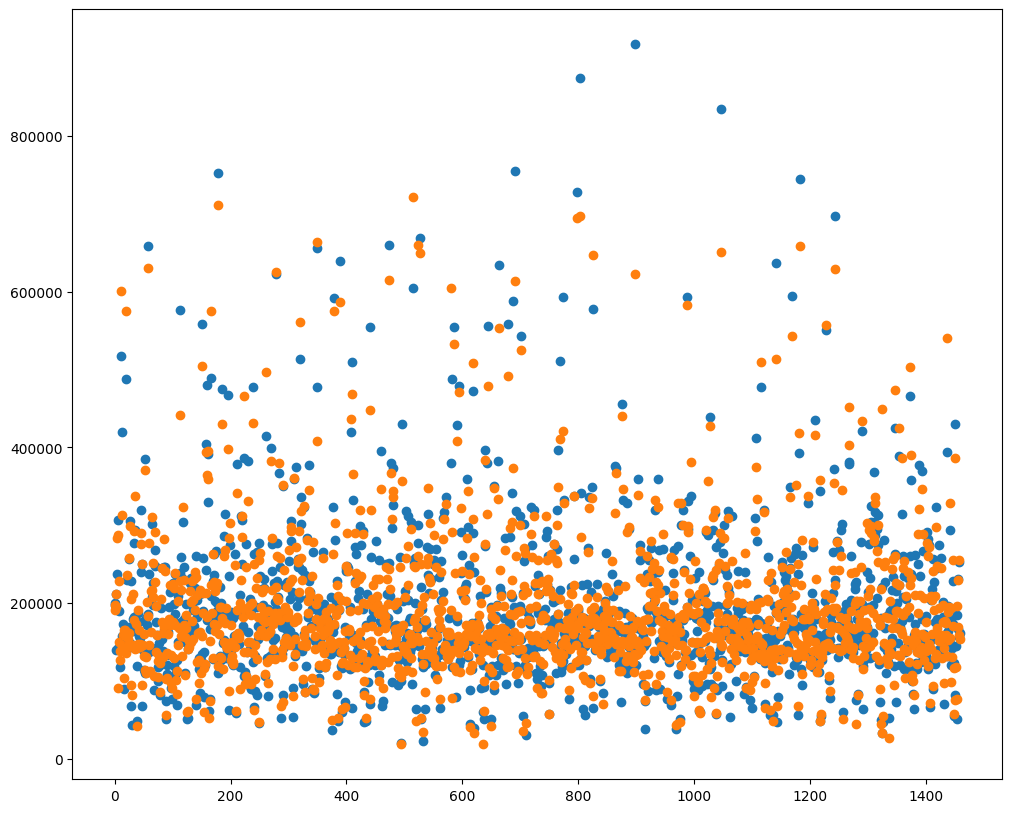

In [ ]:
plt.scatter(range(len(y_true)), y_true)
plt.scatter(range(len(y_true)), y_pred)

/tmp/ipython-input-1473968302.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


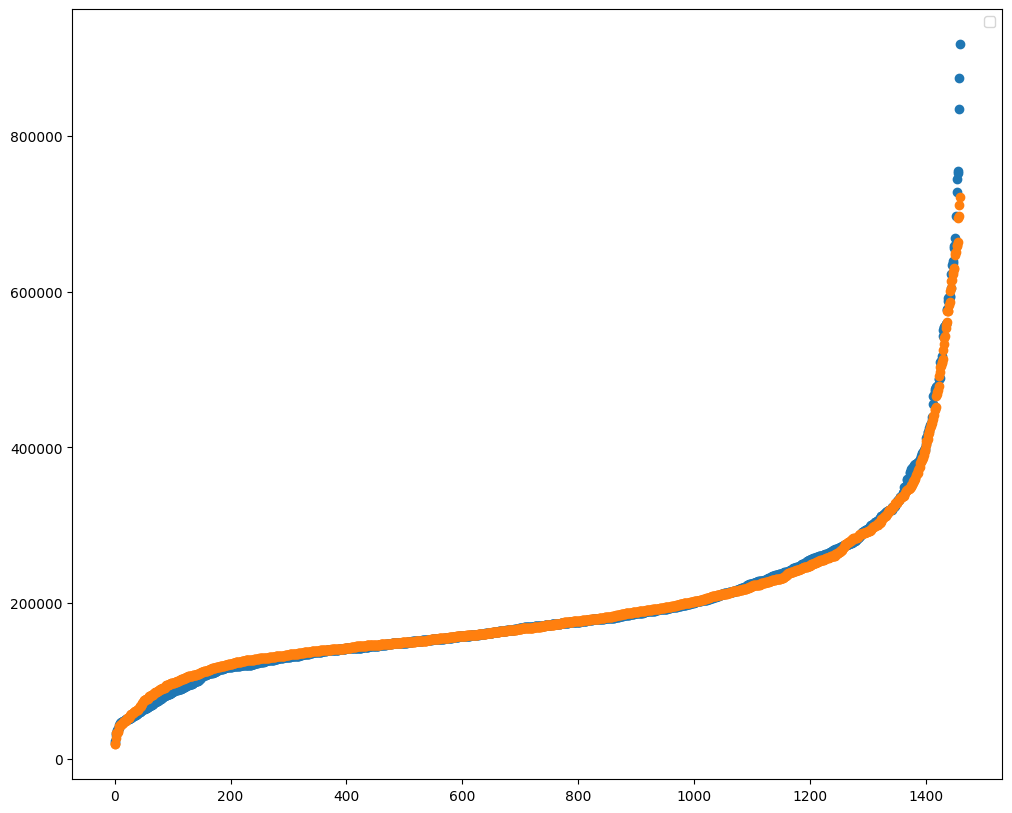

In [ ]:
# another way of visualising
plt.scatter(range(len(y_true)), sorted(y_true))
plt.scatter(range(len(y_true)), sorted(y_pred))
plt.legend()
plt.show()

## Applying PCA

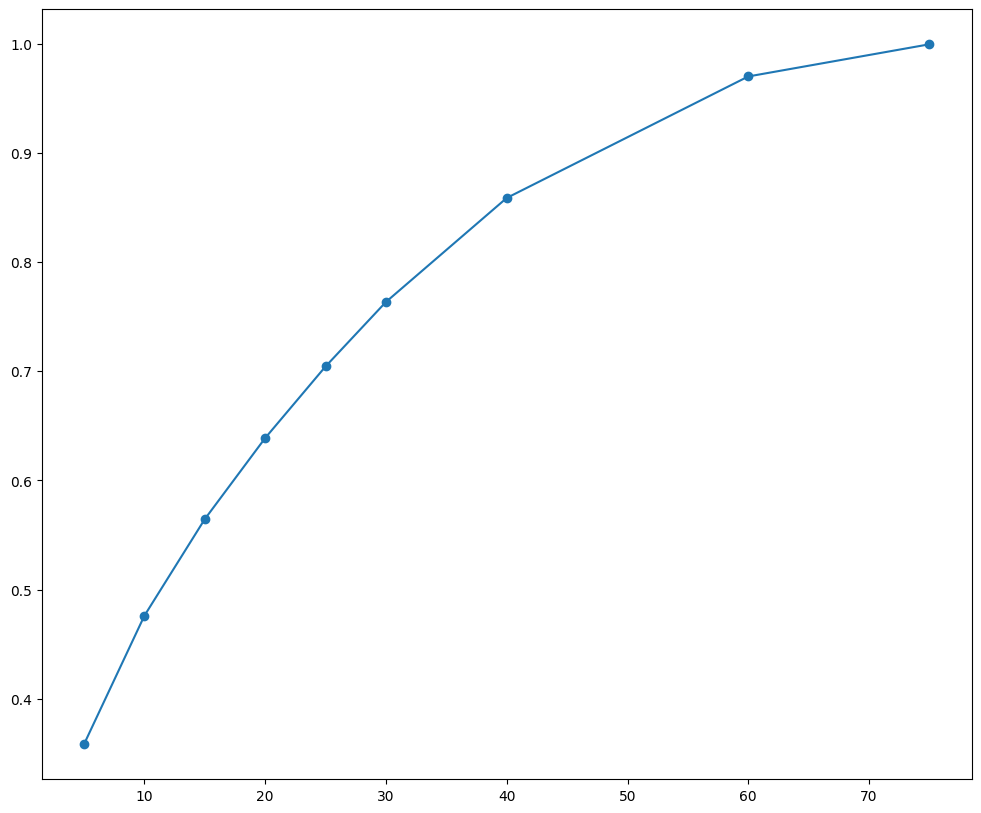

In [ ]:
from sklearn.decomposition import PCA

cs = [5, 10, 15, 20, 25, 30, 40, 60, 75]
info = []
for i in cs:
  pca = PCA(n_components=i)
  pca.fit(ds_scaled[:, :-1])
  info.append(pca.explained_variance_ratio_.sum())

plt.plot(cs, info, '-o')

In [ ]:
pca = PCA(n_components=40)
Xpca = pca.fit_transform(ds_scaled[:, :-1])
y = ds['SalePrice']

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])

for train_index, test_index in kf.split(X):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    baseline_estimator = GradientBoostingRegressor(random_state=0)

    baseline_estimator.fit(X_train, y_train)

    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)

35956.650378010956


In [ ]:
pca = PCA(n_components=60)
Xpca = pca.fit_transform(ds_scaled[:, :-1])
y = ds['SalePrice']

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])

for train_index, test_index in kf.split(X):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    baseline_estimator = GradientBoostingRegressor(random_state=0)

    baseline_estimator.fit(X_train, y_train)

    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)

35463.74778533425


In [ ]:
## PCA Made things worse.

## Outlier Detection

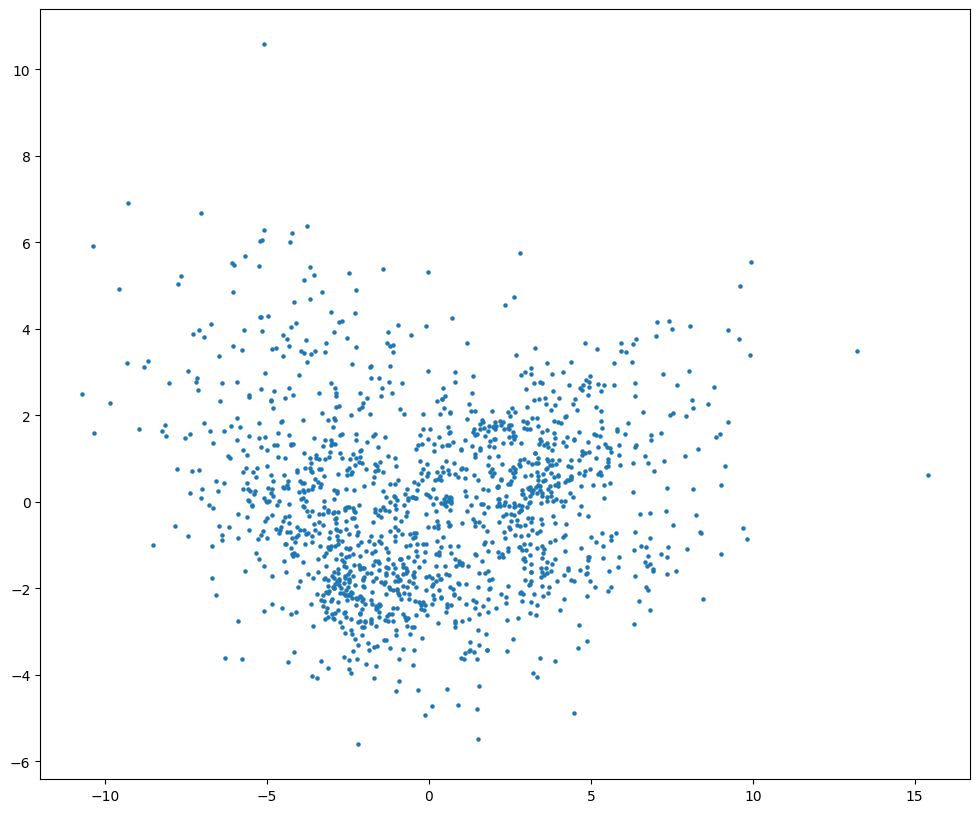

In [ ]:
pca = PCA(n_components=2)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:, 0], vis[:, 1], s = 5)

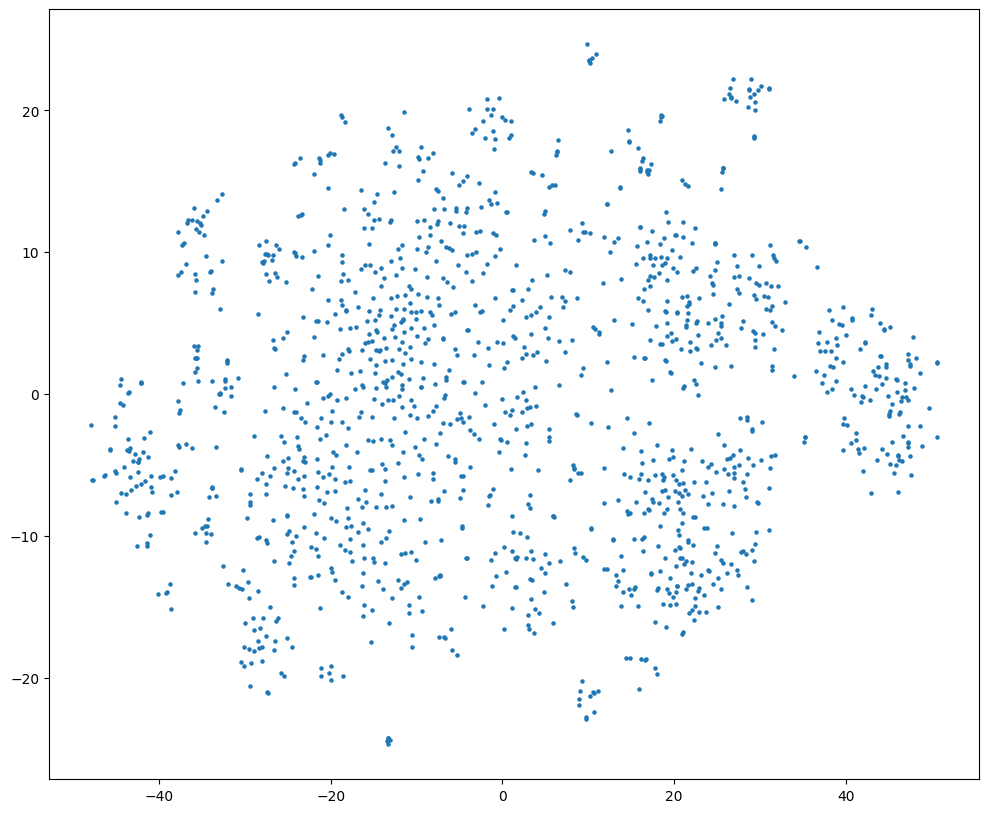

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50, random_state=0)
vis = tsne.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:,0], vis[:,1], s=5)

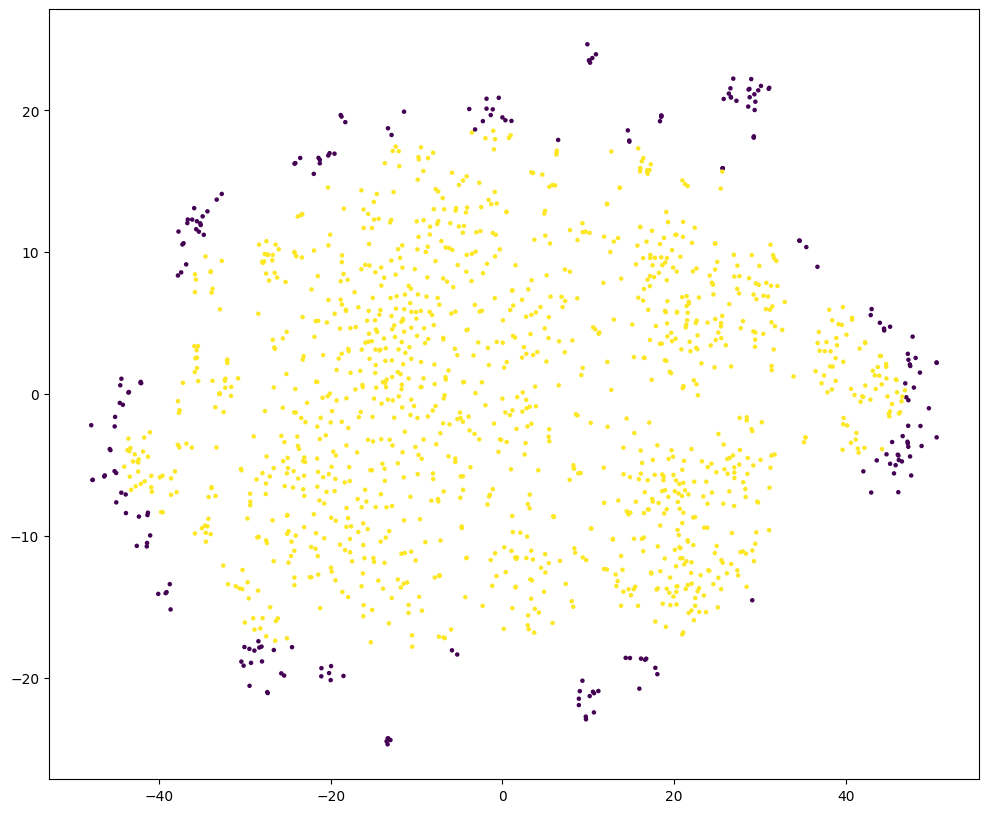

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

is_outlier = IsolationForest(contamination=0.15, random_state=0,
                            n_estimators=1000).fit_predict(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()

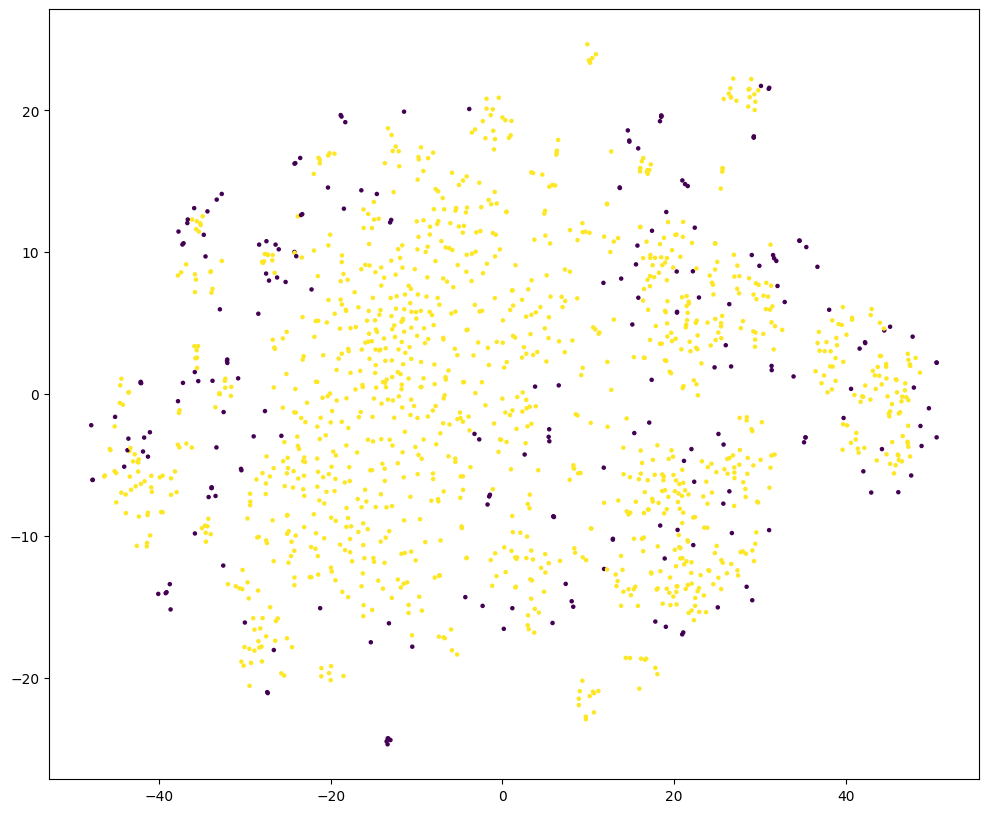

In [ ]:
is_outlier = LocalOutlierFactor(contamination=0.15, n_neighbors=5).fit_predict(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()

## Clustering

How many algos we have?
1. KMEANS
2. Hierarchial
3. GMM
4. DBSCAN

In [ ]:
## K-Means
# Looking at the data, we can say that K-Means probably wont work because of its fundamental nature of making equal sized clusters.

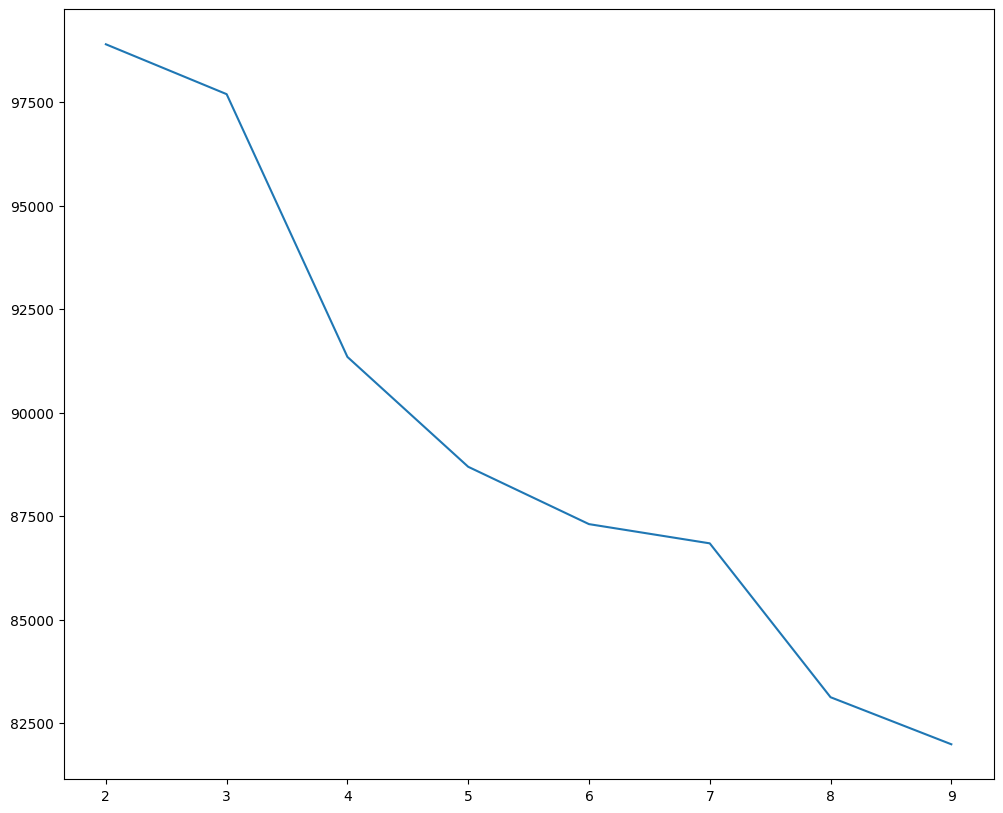

In [ ]:
from sklearn.cluster import KMeans

elbow = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(ds_scaled[:, :-1])
  elbow.append(kmeans.inertia_)

plt.plot(range(2,10), elbow)

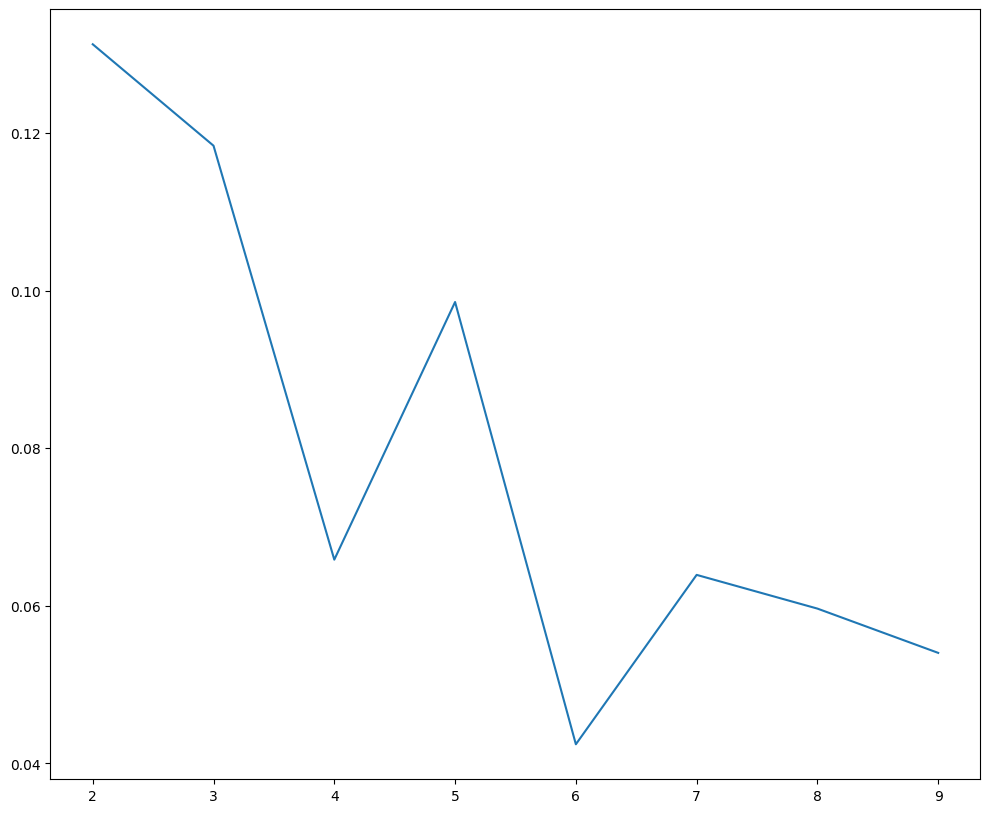

In [ ]:
from sklearn.metrics import silhouette_score

elbow = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(ds_scaled[:, :-1])
  elbow.append(silhouette_score(ds_scaled[:, :-1], kmeans.labels_))

plt.plot(range(2,10), elbow)

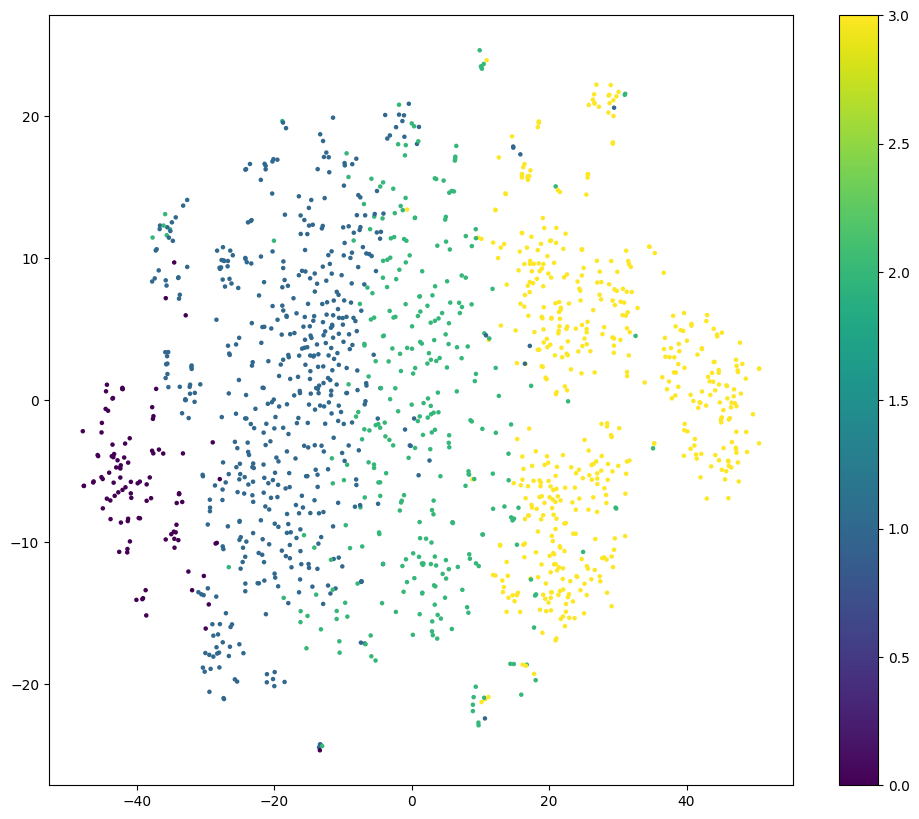

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(ds_scaled[:, :-1])
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=kmeans.labels_)
plt.colorbar()

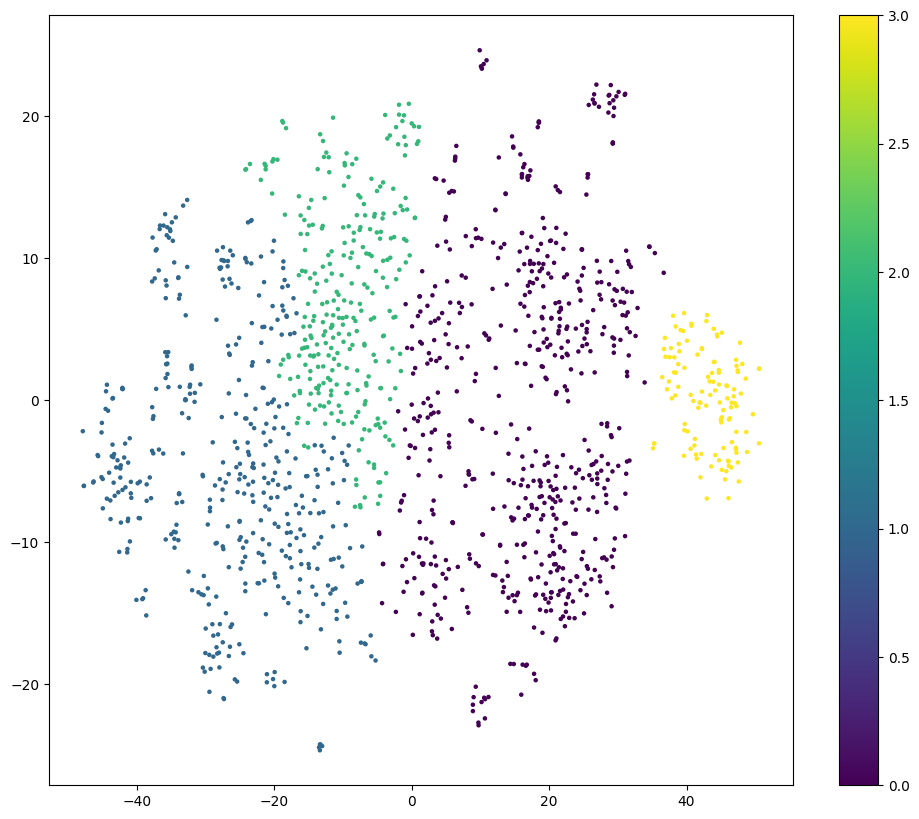

In [ ]:
## Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
hierar = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward').fit(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=hierar.labels_)
plt.colorbar()

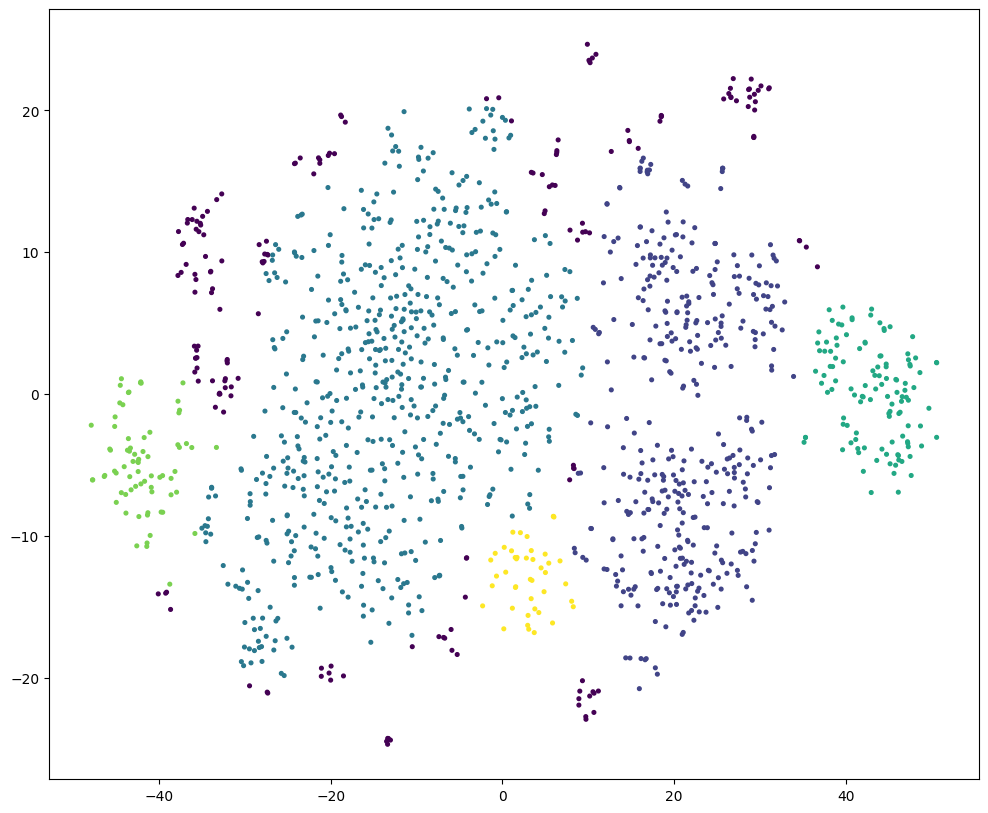

In [ ]:
## DBSCAN

from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 5.5, min_samples = 45).fit(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.show()

In [ ]:
# Again, this is not that we expected. DBSCAN has made some points on the outer region as outliers, and most of the points inside into a single cluster.

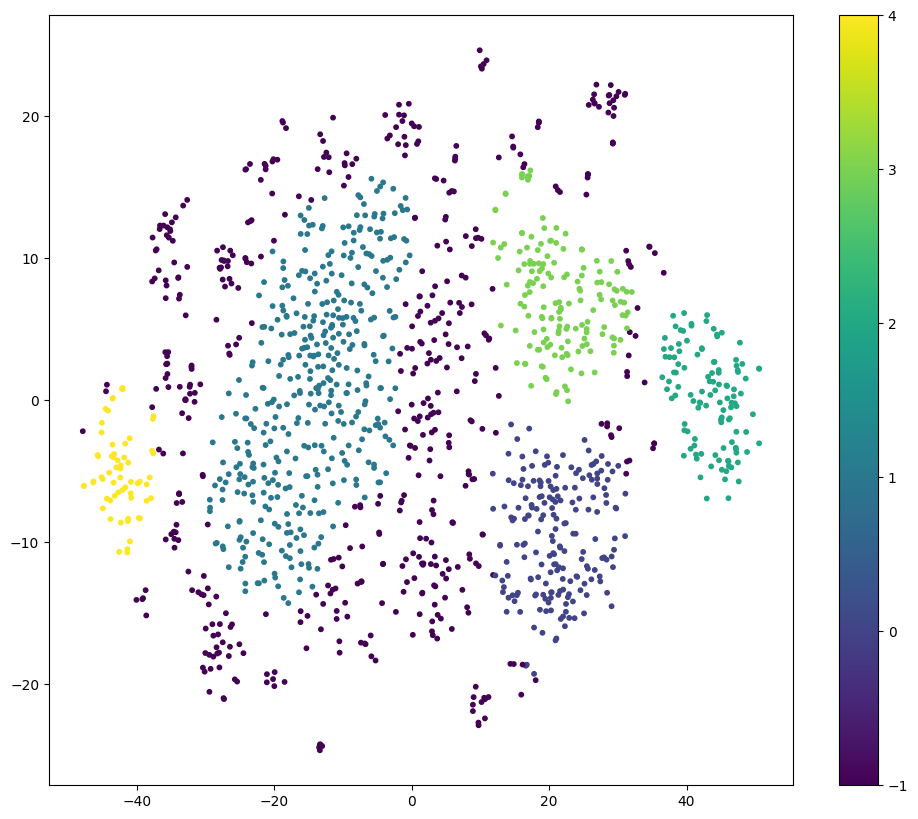

In [ ]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 4.6, min_samples = 45).fit(vis)
plt.scatter(vis[:,0], vis[:,1], s=10, c=dbsc.labels_)
plt.colorbar()

In [ ]:
# Here, you can see how well separated outliers are, and how well clusters are formed compared to previous clustering algorithms.
#Now, for outliers you can take human input from experts for assigning outliers to clusters, or completely remove them.

## EDA on Clusters

In [ ]:
print("Global Mean: ", ds.SalePrice.mean())

Global Mean:  193784.76647260276


In [ ]:
ds.groupby(dbsc.labels_)['SalePrice'].mean()

,SalePrice
-1,178823.573321
0,220084.628010
1,147807.317391
2,416137.815789
3,223946.961783
4,62395.238095


In [ ]:
## Cluster4 is the cheapest house
## Cluster 2 is the Expensive houses

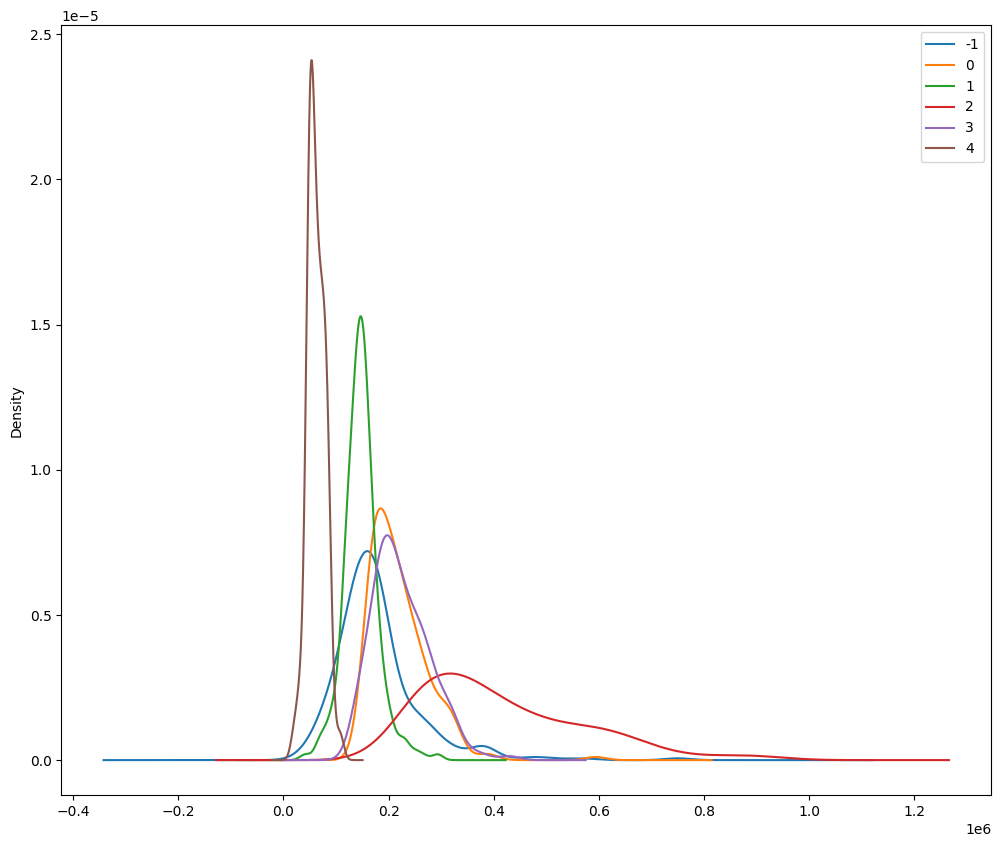

In [ ]:
ds.groupby(dbsc.labels_)['SalePrice'].plot(kind='kde')
plt.legend()

In [ ]:
# # As you can see, cluster 2 (expensive houses) has the highest variances, because of the fact that some of them might be of low price (but comparitively higher than other clusters), and some of them might be high.

# Whereas, cluster 4 has the least variance. From this we can say that it is easy to predict the price of cheap house and it is relatively harder to predict for expensive ones.

# Now, we have total of 79 features and we have total of 5 clusters. Doing EDA for each of them would be not feasible. What we can do is find out the most important features.#

In [ ]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

In [ ]:
fi = pd.DataFrame()
fi['features'] = ds.columns[:-1]
fi['importance'] = baseline_estimator.feature_importances_
fi.sort_values(by='importance', ascending=False)

,features,importance
76,SaleType,0.280922
16,OverallQual,0.257103
45,GrLivArea,0.117095
60,GarageCars,0.079479
11,Neighborhood,0.059666
...,...,...
64,PavedDrive,0.000000
73,MiscVal,0.000000
72,MiscFeature,0.000000
71,Fence,0.000000


In [ ]:
ds.groupby(dbsc.labels_)[['OverallQual', 'SaleType', 'GrLivArea', 'GarageCars',
                         'SalePrice']].mean()

,OverallQual,SaleType,GrLivArea,GarageCars,SalePrice
-1,5.909789,177787.337243,1604.798464,1.785029,178823.573321
0,7.057592,175701.903688,1953.680628,2.204188,220084.628010
1,5.260870,173730.587899,1205.913043,1.417874,147807.317391
2,7.596491,406700.434426,1763.070175,2.517544,416137.815789
3,7.267516,174346.209297,1488.464968,2.261146,223946.961783
4,4.650794,175854.364569,1101.539683,0.000000,62395.238095


## Baseline model without Outlier:

In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = ds['SalePrice'].values[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5,  mape(y_true, y_pred))

29028.295913584705 0.09208700200087104


## Baseline model on outliers

In [ ]:
outliers_X = ds_scaled[dbsc.labels_==-1][:, :-1]
outliers_y = ds[dbsc.labels_==-1]['SalePrice'].values
print(mse(outliers_y, baseline_estimator.predict(outliers_X))**0.5)
print(mape(outliers_y, baseline_estimator.predict(outliers_X)))

48676.354661007455
0.1547631137041452


In [ ]:
0.1547631137041452 * 100

15.47631137041452

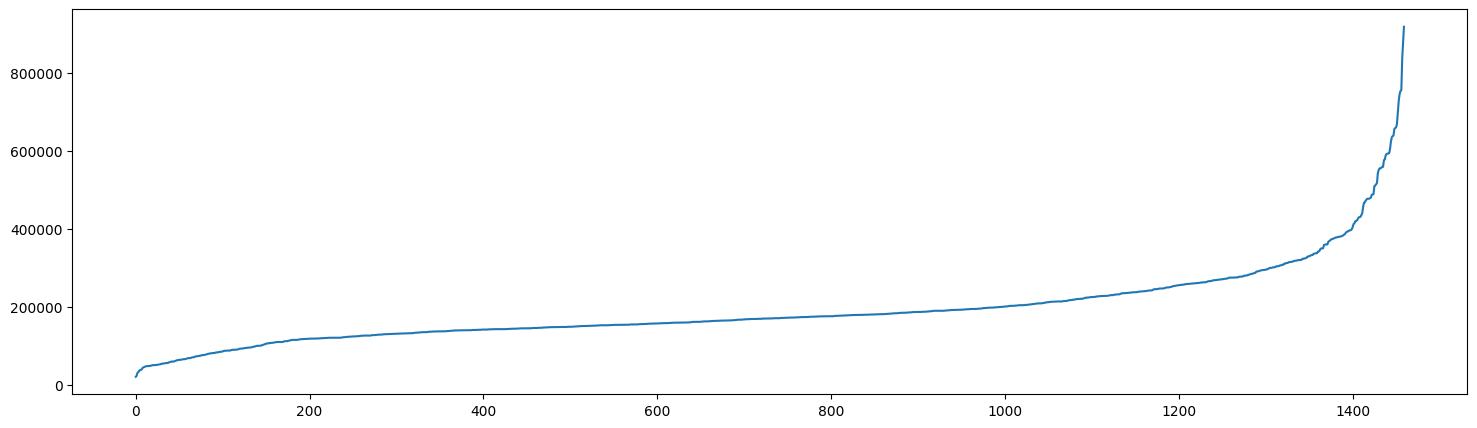

In [ ]:
plt.figure (figsize=(18, 5))
plt.plot(sorted(ds.SalePrice))

## Target Transformation

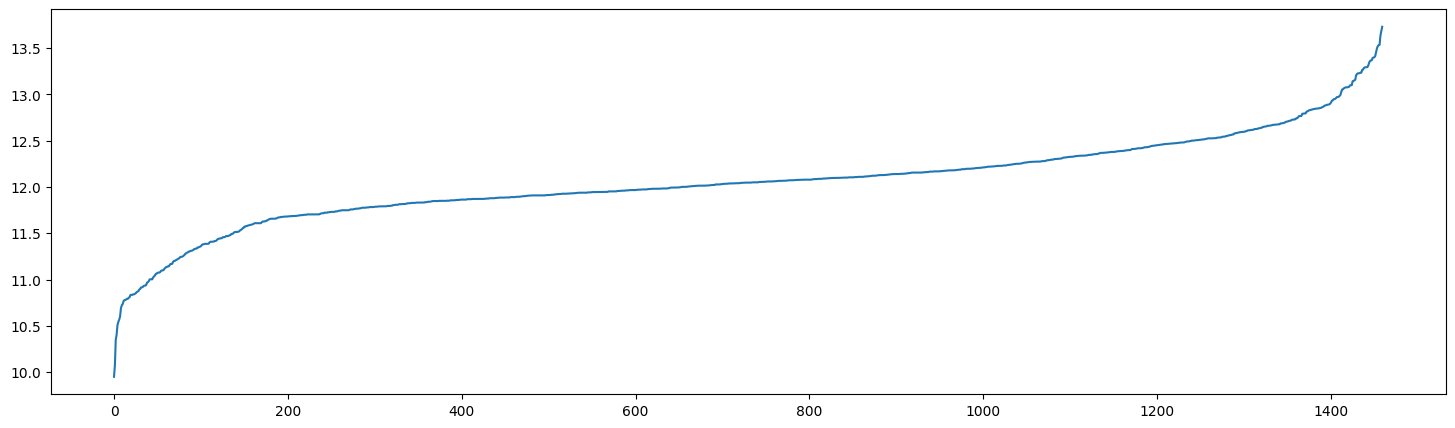

In [ ]:
plt.figure (figsize=(18, 5))
plt.plot(sorted(np.log(ds.SalePrice)))

In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

28933.710976115708 0.0872527385573824


## Baseline model (Cluster-wise)

In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0
for cluster in range(5):
    y_true, y_pred = np.array([]), np.array([])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        c_train, c_test = c[train_index], c[test_index]
        estimator = GradientBoostingRegressor(random_state=0)
        estimator.fit(X_train, y_train)
        y_true = np.append(y_true, np.exp(y_test[c_test==cluster]))
        y_pred = np.append(y_pred, np.exp(estimator.predict(X_test[c_test==cluster])))
    mses.append(mse(y_true, y_pred)*len(y_true)**0.5)
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred)**0.5, 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

0 mse : 23245.286602460616 mape: 0.06448195506201788
1 mse : 17361.105116704814 mape: 0.0912526836525036
2 mse : 65507.48853645383 mape: 0.10553452145054883
3 mse : 19088.014839427262 mape: 0.06121973965948594
4 mse : 13628.145931614581 mape: 0.1617971822936239
69710039.44370031 0.0872527385573824


## Problem with Clustering:
We initially thought that finding clusters in the data would help us achieve better results. But, there was no significant improvement there. Why did that happended?

So, when we train the model on whole dataset, there is some training accuracy and some testing accuracy.

But, when we train model on a piece of cluster, only training score tends to improve because of less number of points. Because of which the model overfits on that particular cluster.

And, this does not guarantee that the testing accuracy will be better.

## Merged Clusters

In [ ]:
mses = []
mapes = []
n = 0

dbsc_merged = pd.Series(dbsc.labels_).copy()
dbsc_merged.loc[dbsc_merged == 0] = 1
dbsc_merged.loc[dbsc_merged == 3] = 1

estimators = [GradientBoostingRegressor(n_estimators=50, learning_rate=0.6,max_depth=1, random_state=0)]
final_estimator = LinearRegression()

for cluster in range(1,5):
    X = ds_scaled[dbsc_merged==cluster][:, :-1]
    y = np.log(ds['SalePrice'].values)[dbsc_merged==cluster]
    estimator = GradientBoostingRegressor(random_state=0)
    # estimator = stacking(estimators, final_estimator)
    kf = KFold(n_splits=5)

    y_true, y_pred = np.array([]), np.array([])
    _ = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        _.append(mse(np.exp(y_train), np.exp(estimator.predict(X_train))))
        y_true = np.append(y_true, np.exp(y_test))
        y_pred = np.append(y_pred, np.exp(estimator.predict(X_test)))
    print(sum(_)/len(_))
    mses.append(mse(y_true, y_pred)*len(y_true)**0.5)
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred)**0.5, 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

86400864.75692168
1 mse : 20386.478803518177 mape: 0.07807133541723245
29890938.67472768
2 mse : 73283.07160659938 mape: 0.11243238212319286


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=0.

In [ ]:
99382396.22868016
2 mse : 21186.911841693636 mape: 0.07859122826426093
29355657.71088885
3 mse : 73239.78499901223 mape: 0.11229724808431502
105888.25014402505
4 mse : 13258.2498370825 mape: 0.18427199950034548
73510666.6577067 0.08930740772418197

## Architecture

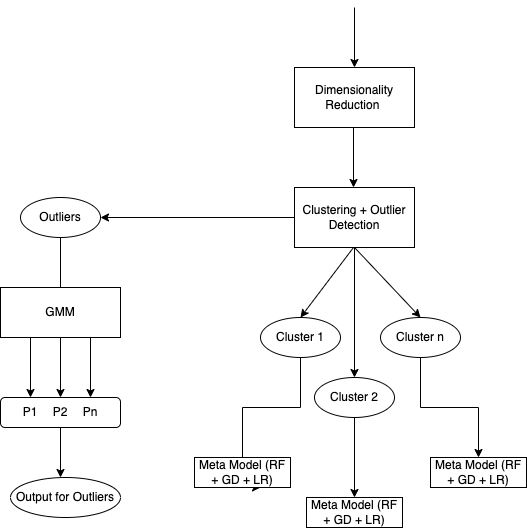

In [ ]:
gaussians = {}
for cluster in range(2, 5):
    gaussians[cluster] = (
        vis[dbsc_merged==cluster].mean(axis=0),
        np.cov(vis[dbsc_merged==cluster].T)
    )

/tmp/ipython-input-2040832181.py:4: RuntimeWarning: Mean of empty slice.
  vis[dbsc_merged==cluster].mean(axis=0),
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/tmp/ipython-input-2040832181.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice
  np.cov(vis[dbsc_merged==cluster].T)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
gaussians

{2: (array([43.430126  ,  0.20538108], dtype=float32),
  array([[13.12520676, -4.1900418 ],
         [-4.1900418 , 10.88243699]])),
 3: (array([nan, nan], dtype=float32),
  array([[nan, nan],
         [nan, nan]])),
 4: (array([-42.36302  ,  -5.0644298], dtype=float32),
  array([[ 6.09137943, -0.56276045],
         [-0.56276045,  8.03119956]]))}

In [ ]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50,random_state=42)),
    ('gbdt', GradientBoostingRegressor(n_estimators=50, learning_rate=0.6,max_depth=1, random_state=0)),
    ('knn', KNeighborsRegressor(n_neighbors=7))
]
final_estimator = LinearRegression()

In [ ]:
#custom stacking
class stacking(BaseEstimator):
  def __init__(self, estimators, final_estimator):
      self.estimators = estimators
      self.final_estimator = final_estimator


  def fit(self, X, y=None):
        for estimator in self.estimators:
            estimator[1].fit(X, y)

        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        self.final_estimator.fit(pred_features, y)

  def predict(self, X):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.predict(pred_features)

  def score(self, X, y):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.score(pred_features, y)

In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]

    # baseline_estimator = GradientBoostingRegressor(random_state=0)
    baeline_estimator = StackingRegressor(estimators, final_estimator)
    baseline_estimator.fit(X_train, y_train)

    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

28933.710976115708 0.0872527385573824


In [ ]:
## Streamlit --> Python based Vizulization (FrontEnd UI)

In [ ]:
## Build a Demand Forcasting Model -

Men's T-shirt --> W1 (1000), W2 (1200), W3(800)
Women's Jeans --->


Seson affects invenetory? (fb prophet)